# Set up

In [ ]:
!git clone https://github.com/pauljensen/PyAutoSci
%cd PyAutoSci

In [1]:
from FactorSet import *
from gp_update_function import *
from InitStrategies import *
from PlotWrapper import *
from plan_next_experiment import *
import matplotlib.pyplot as plt
from plot_heatmaps import *
from sklearn.gaussian_process.kernels import RBF

# Add factor (variables)

In [2]:
factors = FactorSet()
factors.add_categorical(name="projectile", levels=["pingpong", "whiffle"])
factors.add_continuous(name="draw_angle", minimum=20, maximum=120)
factors.add_ordinal(name="rubber_bands", levels=[1, 2, 3])

# Create initial designs

In [3]:
n = 6
X_maximin = create_design("Maximin",factors,n)
X_LHS = create_design("LHS",factors,n)
X_random = create_design("Random",factors,n)

/Users/noelletoong/Documents/UMich/Research/PyAutoSci/InitStrategies.py:131: UserWarning: Using discrete factors whose levels are not the same as the number of runs will not result in a true Latin Hypercube sampling design. The discrete factors with different numbers of levels compared to runs: draw_angle, projectile
  warnings.warn("Using discrete factors whose levels are not the same as the number of runs will not result in a true Latin Hypercube sampling design. The discrete factors with different numbers of levels compared to runs: " + str_of_factors)


In [3]:
X_maximin = pd.read_csv("sample_designs/Maximin_Sample_Design_6Points.csv")

In [4]:
plot_design(X_LHS,factors)

In [5]:
X = X_maximin

# Collect responses to the Maximin design

In [6]:
X_maximin

draw_angle projectile  rubber_bands
0   73.656890    whiffle           3.0
1   23.762279    whiffle           2.0
2   84.167300   pingpong           2.0
3   69.700412    whiffle           1.0
4  131.276479   pingpong           1.0
5  132.758294   pingpong           3.0

In [7]:
#add your responses in this list in order
y = [0.5, 1.3, 1.6, 1.7, 1.5, 1.2]

In [8]:
#Try to do a mixture of strategies - first do Exploration, then Exploit, then EI
kernel = RBF()
gp = GaussianProcessRegressor(kernel)
gp = train_model(gp,X,y,factors)

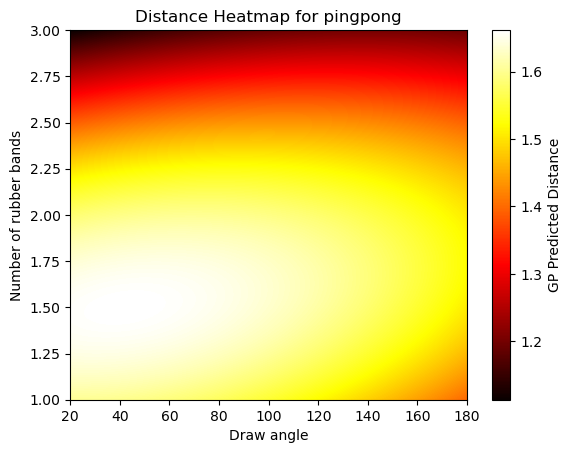

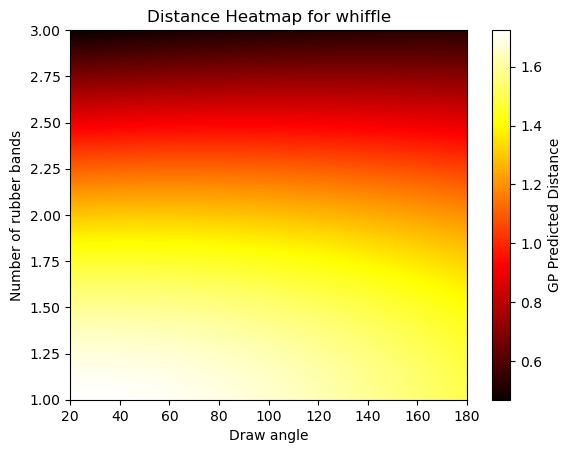

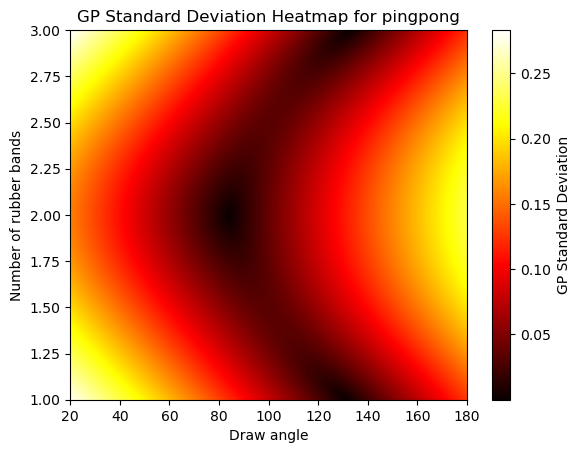

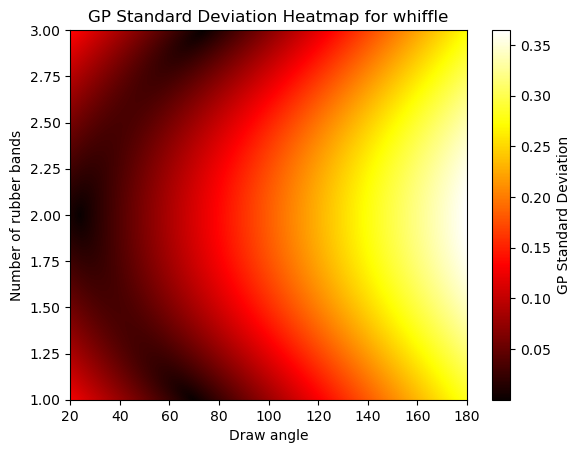

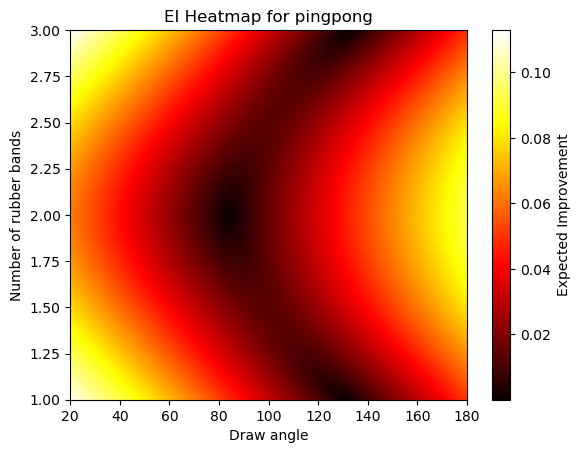

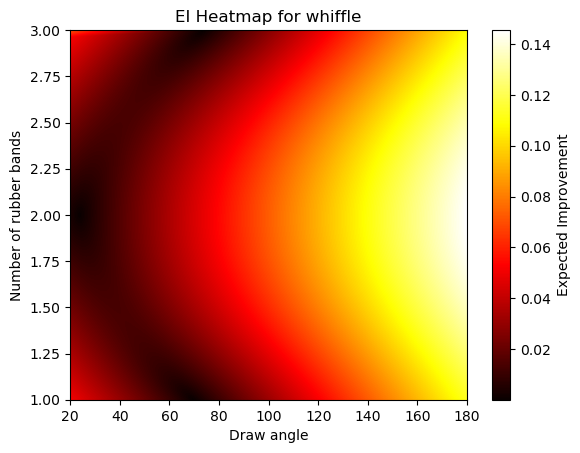

In [10]:
distance_heatmaps(gp,factors)
uncertainty_heatmaps(gp,factors)
EI_heatmaps(gp,factors)

In [18]:
policy = "Exploitation"
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [19]:
X_new

draw_angle projectile  rubber_bands
0       180.0   pingpong           3.0

In [20]:
y_new = 2.0

In [21]:
gp = update_model(gp,X_new,y_new,factors)

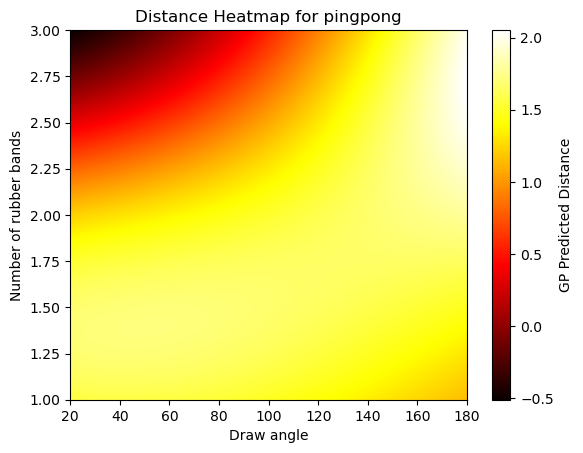

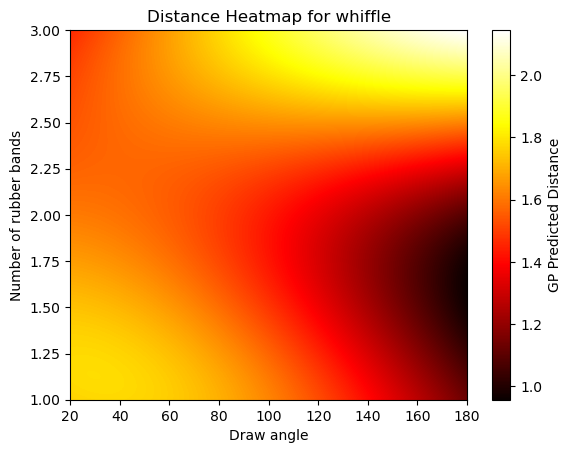

In [22]:
#plot new distance heatmaps
distance_heatmaps(gp,factors)

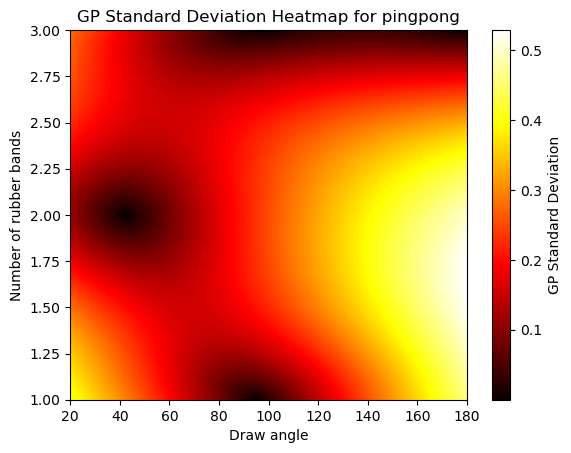

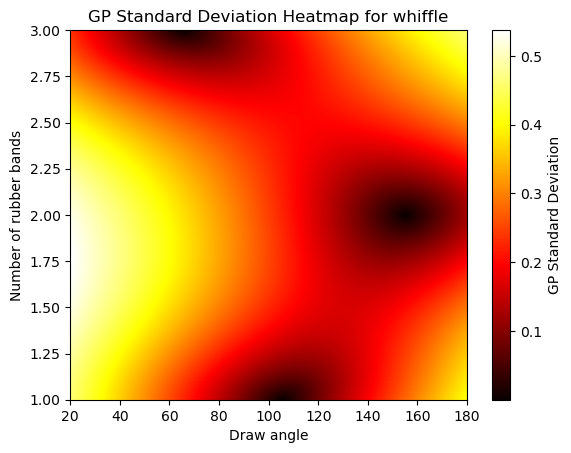

In [23]:
#now plot uncertainty heatmaps
uncertainty_heatmaps(gp,factors)

In [24]:
policy = "Exploration"
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [25]:
X_new

draw_angle projectile  rubber_bands
0        20.0    whiffle           2.0

In [26]:
y_new = 0.5

In [27]:
gp = update_model(gp, X_new, y_new, factors)

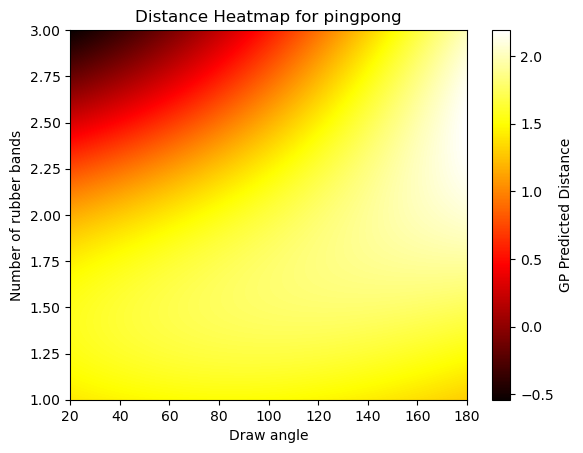

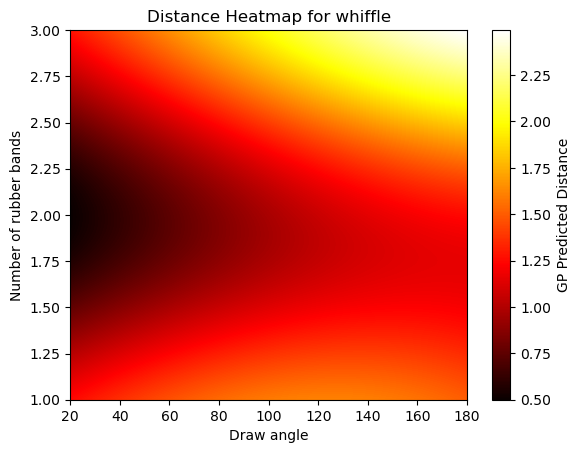

In [30]:
#plot new distance heatmaps
distance_heatmaps(gp,factors)

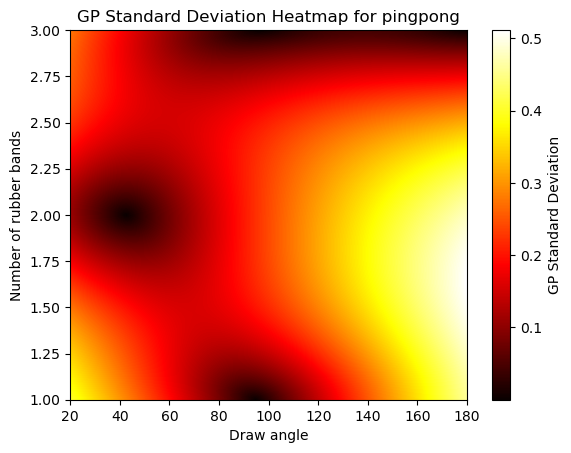

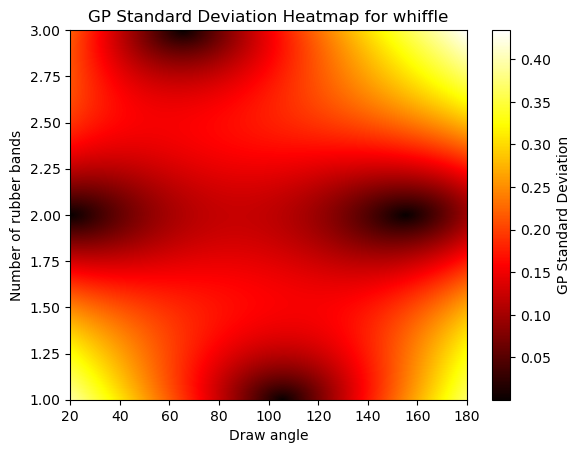

In [28]:
#plot new uncertainty heatmaps
uncertainty_heatmaps(gp,factors)

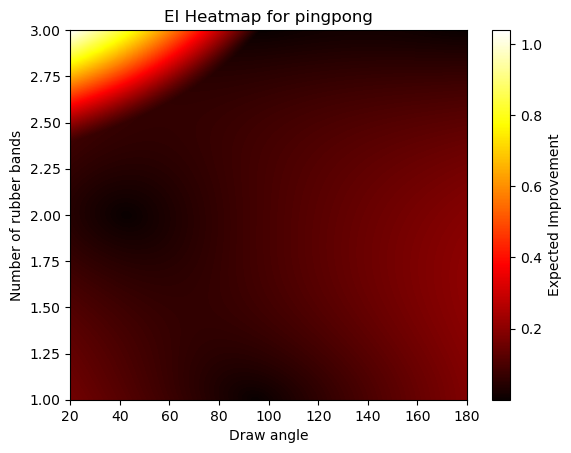

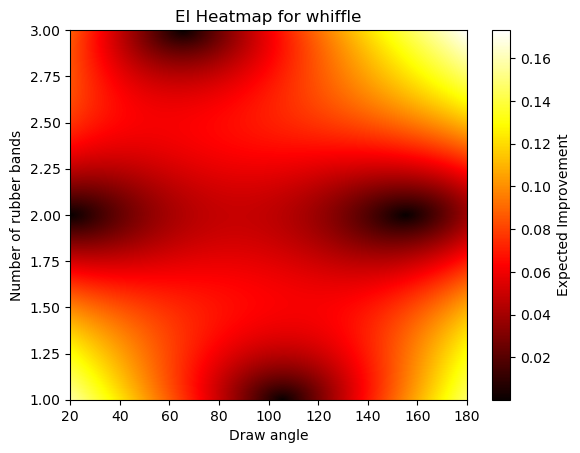

In [29]:
#plot EI heatmaps
EI_heatmaps(gp,factors)

In [31]:
#plan next experiment with EI
X_new, obj_val = plan_next_experiment(gp, factors, "EI")

In [32]:
X_new

draw_angle projectile  rubber_bands
0        20.0   pingpong           3.0

In [33]:
y_new = 0.111

In [34]:
gp = update_model(gp, X_new, y_new, factors)

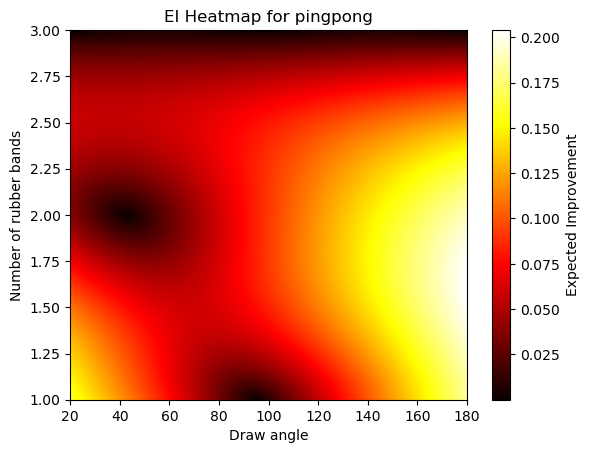

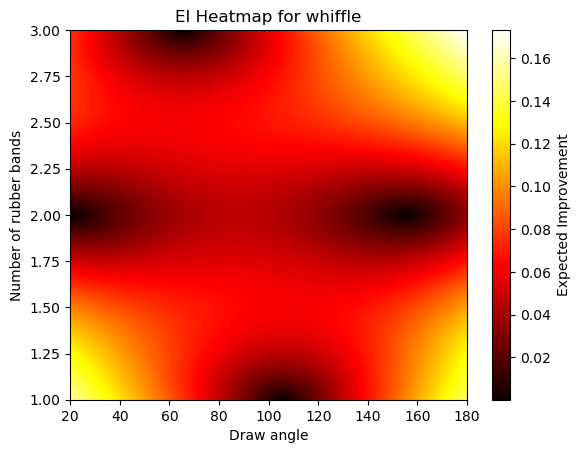

In [35]:
EI_heatmaps(gp,factors)

In [36]:
gp.X_train_

array([[0.48005917, 0.        , 2.        ],
       [0.14160236, 0.        , 1.        ],
       [0.53493066, 1.        , 0.        ],
       [0.28481918, 1.        , 2.        ],
       [0.46830659, 0.        , 0.        ],
       [0.84547401, 1.        , 1.        ],
       [1.        , 0.        , 2.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 0.        , 2.        ]])

In [37]:
gp.y_train_

array([0.5  , 1.3  , 1.6  , 1.7  , 1.5  , 1.2  , 2.   , 0.5  , 0.111])

# Perform the automated science loop via the distance Exploitation strategy

## Train a Gaussian Process on the initial maximin data and responses

In [ ]:
kernel = RBF()
gp_exploitation = GaussianProcessRegressor(kernel)
gp_exploitation = train_model(gp_exploitation,X_maximin,y,factors)

## Iteration 1

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Iteration 2

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Iteration 3

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Iteration 4

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Iteration 5

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Iteration 6

### Plot the distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploitation, obj_val = plan_next_experiment(gp_exploitation, factors, "Exploitation")

In [ ]:
next_experiment_exploitation

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploitation = update_model(gp_exploitation,next_experiment_exploitation,y_new,factors)

## Plot final distance heat maps

In [ ]:
distance_heatmaps(gp_exploitation,factors)

# Perform the automated science loop via the uncertainty Exploration strategy

## Train a Gaussian Process on the initial maximin data and responses

In [ ]:
kernel = RBF()
gp_exploration = GaussianProcessRegressor(kernel)
gp_exploration = train_model(gp_exploration,X_maximin,y,factors)

## Iteration 1

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Iteration 2

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Iteration 3

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Iteration 4

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Iteration 5

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Iteration 6

### Plot the standard deviation heat maps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_exploration, obj_val = plan_next_experiment(gp_exploration, factors, "Exploration")

In [ ]:
next_experiment_exploration

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_exploration = update_model(gp_exploration,next_experiment_exploration,y_new,factors)

## Plot the final standard deviation heatmaps

In [ ]:
uncertainty_heatmaps(gp_exploration,factors)

# Perform the automated science loop via the hybrid Expected Improvement strategy

## Train a Gaussian Process on the initial maximin data and the responses

In [6]:
kernel = RBF()
gp_ei = GaussianProcessRegressor(kernel)
gp_ei = train_model(gp_ei,X_maximin,y,factors)

## Iteration 1

### Plot the EI heat maps

y_min: 0.5
mu: [1.60215863 1.60215851 1.60215795 ... 1.19293252 1.19286358 1.19279433]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.27945491 0.27907039 0.27868581 ... 0.12168044 0.12209541 0.12251038]
ei_values: [[0.11148638 0.11133298 0.11117955 ... 0.04997849 0.05014362 0.05030874]
 [0.11134078 0.11118739 0.11103396 ... 0.05009483 0.0502599  0.05042496]
 [0.11119527 0.11104187 0.11088844 ... 0.05021156 0.05037657 0.05054158]
 ...
 [0.11260913 0.11245623 0.1123033  ... 0.04878171 0.04894715 0.04911258]
 [0.11275806 0.11260516 0.11245223 ... 0.04866239 0.04882788 0.04899337]
 [0.11290706 0.11275416 0.11260123 ... 0.04854347 0.04870902 0.04887457]]


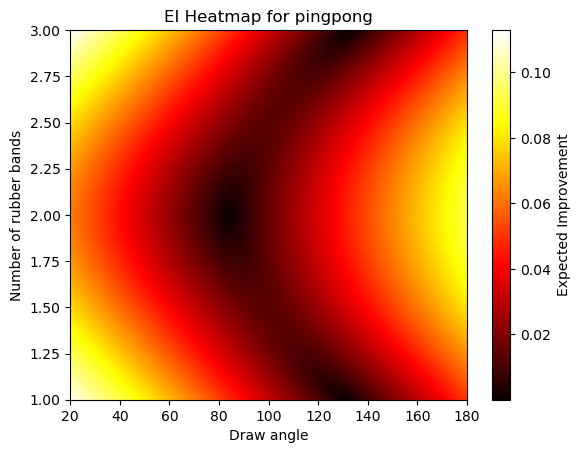

y_min: 0.5
mu: [1.72457885 1.72457195 1.72456458 ... 0.52794534 0.5279469  0.52794833]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.12799073 0.12758232 0.12717388 ... 0.27162095 0.27202097 0.27242093]
ei_values: [[0.05106092 0.05089798 0.05073504 ... 0.11237878 0.11253743 0.11269606]
 [0.05092165 0.05075875 0.05059583 ... 0.11247083 0.11262943 0.11278799]
 [0.05078262 0.05061974 0.05045685 ... 0.11256309 0.11272163 0.11288013]
 ...
 [0.0700064  0.06978437 0.06956238 ... 0.10855832 0.10871778 0.10887722]
 [0.07114389 0.0709217  0.07069954 ... 0.10845959 0.10861911 0.10877861]
 [0.07228861 0.07206628 0.07184398 ... 0.10836108 0.10852067 0.10868023]]


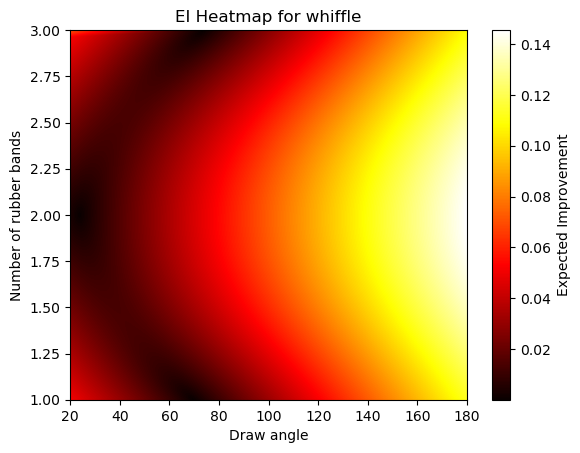

In [7]:
EI_heatmaps(gp_ei,factors)

In [8]:
calculate_EI([[1.0, 1.0, 0.0]],gp_ei)

y_min: 0.5
mu: [1.49885732]
[0.]
improvement: [0.]
sigma: [0.28248712]


/Users/noelletoong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


array([0.11269606])

### Select the next experiment to perform based on distance

In [9]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [10]:
next_experiment_ei

draw_angle projectile  rubber_bands
0       180.0    whiffle           2.0

### Record the response of the selected experiment

In [11]:
y_new = 2.0#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [12]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Iteration 2

### Plot the EI heat maps

y_min: 0.5
mu: [1.17407019 1.17486129 1.17565184 ... 1.2513996  1.2513779  1.25135484]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.54568849 0.54504152 0.54439404 ... 0.25433626 0.25518481 0.25603313]
ei_values: [[0.21769821 0.21744011 0.2171818  ... 0.10446174 0.10479897 0.10513611]
 [0.21754122 0.21728309 0.21702476 ... 0.10451636 0.10485343 0.10519041]
 [0.21738427 0.21712611 0.21686775 ... 0.10457364 0.10491054 0.10524735]
 ...
 [0.21986399 0.21960785 0.21935152 ... 0.1015842  0.10192238 0.10226047]
 [0.22002578 0.21976967 0.21951336 ... 0.10152346 0.10186182 0.10220008]
 [0.22018758 0.2199315  0.21967522 ... 0.10146549 0.10180401 0.10214244]]


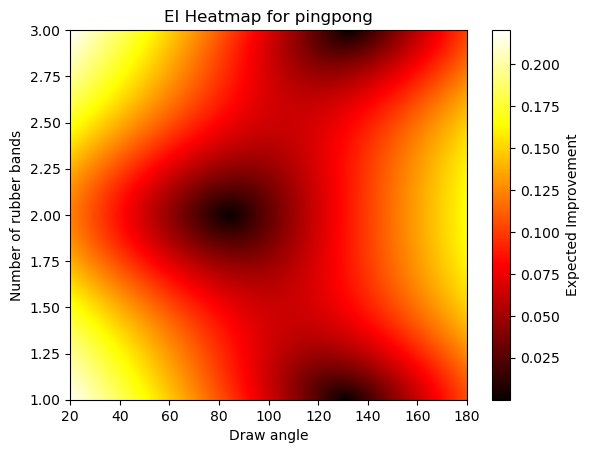

y_min: 0.5
mu: [1.44687984 1.44783228 1.44878404 ... 0.88918578 0.88948595 0.88978497]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.25076952 0.24996216 0.24915469 ... 0.46248806 0.46307792 0.46366745]
ei_values: [[0.10004256 0.09972047 0.09939834 ... 0.18912419 0.18935236 0.18958039]
 [0.09991886 0.09959699 0.09927507 ... 0.18889852 0.18912646 0.18935426]
 [0.09979663 0.09947498 0.09915329 ... 0.18867283 0.18890054 0.18912812]
 ...
 [0.26663248 0.26587311 0.26511329 ... 0.18407113 0.18430599 0.18454071]
 [0.2681355  0.26737715 0.26661835 ... 0.18428856 0.18452365 0.18475861]
 [0.26963863 0.26888132 0.26812356 ... 0.18450604 0.18474136 0.18497655]]


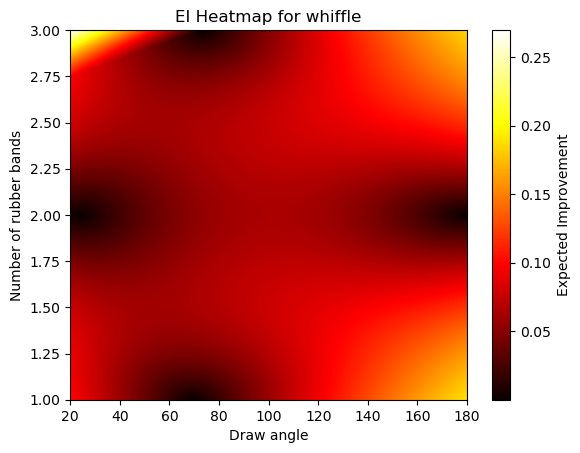

In [14]:
EI_heatmaps(gp_ei,factors)

### Select the next experiment to perform based on distance

In [15]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [16]:
next_experiment_ei

draw_angle projectile  rubber_bands
0        20.0    whiffle           3.0

### Record the response of the selected experiment

In [17]:
y_new = 0.12#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [18]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Iteration 3

### Plot the EI heat maps

y_min: 0.12
mu: [1.21112976 1.21189542 1.21266042 ... 1.278803   1.27883508 1.27886556]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.54083669 0.5401906  0.53954403 ... 0.24860522 0.24945056 0.25029575]
ei_values: [[0.21576262 0.21550487 0.21524693 ... 0.10320108 0.10353467 0.10386817]
 [0.21560135 0.21534357 0.21508559 ... 0.10325116 0.10358458 0.1039179 ]
 [0.21544014 0.21518233 0.21492432 ... 0.10330394 0.10363717 0.10397032]
 ...
 [0.19241659 0.19221299 0.19200921 ... 0.09932508 0.099662   0.09999885]
 [0.19254207 0.19233858 0.1921349  ... 0.0992507  0.09958778 0.0999248 ]
 [0.1926679  0.19246451 0.19226093 ... 0.09917913 0.09951638 0.09985356]]


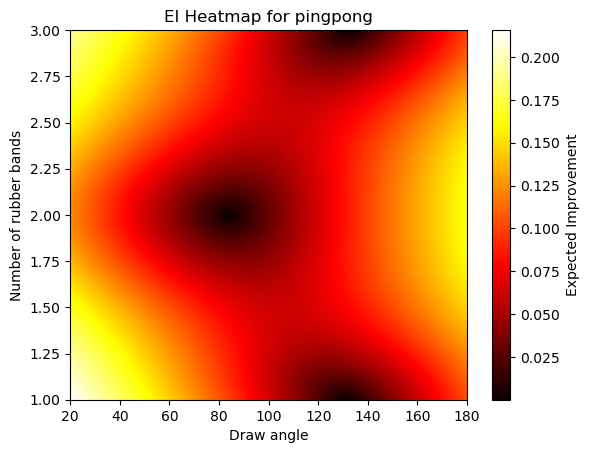

y_min: 0.12
mu: [1.47218255 1.47307282 1.47396229 ... 1.0470424  1.04740246 1.04776083]
[0. 0. 0. ... 0. 0. 0.]
improvement: [0. 0. 0. ... 0. 0. 0.]
sigma: [0.24582097 0.24502192 0.24422279 ... 0.34387349 0.34456109 0.34524878]
ei_values: [[9.80683782e-02 9.77496016e-02 9.74307985e-02 ... 1.80382432e-01
  1.80599888e-01 1.80817232e-01]
 [9.79306915e-02 9.76121167e-02 9.72935162e-02 ... 1.80139348e-01
  1.80356522e-01 1.80573583e-01]
 [9.77944675e-02 9.74761027e-02 9.71577130e-02 ... 1.79896328e-01
  1.80113216e-01 1.80329993e-01]
 ...
 [9.12547403e-04 9.18474075e-04 9.32634446e-04 ... 1.36842462e-01
  1.37116566e-01 1.37390704e-01]
 [4.57081394e-04 4.67153172e-04 4.92813784e-04 ... 1.37013681e-01
  1.37287892e-01 1.37562137e-01]
 [3.98942075e-06 8.80397570e-05 1.75430104e-04 ... 1.37185674e-01
  1.37459989e-01 1.37734335e-01]]


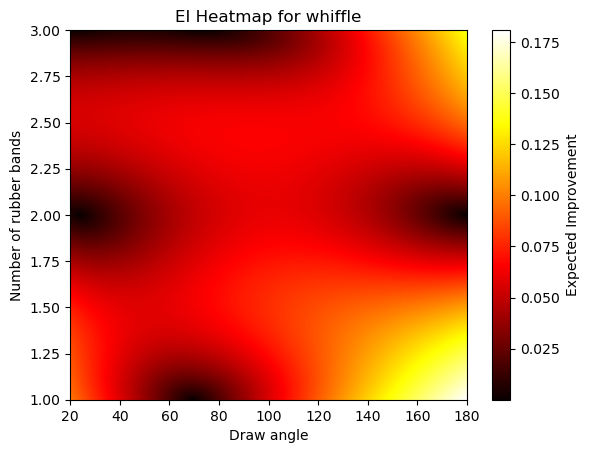

In [19]:
EI_heatmaps(gp_ei,factors)

### Select the next experiment to perform based on distance

In [20]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [21]:
next_experiment_ei

draw_angle projectile  rubber_bands
0        20.0   pingpong           1.0

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Iteration 4

### Plot the EI heat maps

In [ ]:
ei_heatmaps(gp_ei,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [ ]:
next_experiment_ei

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Iteration 5

### Plot the EI heat maps

In [ ]:
ei_heatmaps(gp_ei,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [ ]:
next_experiment_ei

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Iteration 6

### Plot the EI heat maps

In [ ]:
ei_heatmaps(gp_ei,factors)

### Select the next experiment to perform based on distance

In [ ]:
next_experiment_ei, obj_val = plan_next_experiment(gp_ei, factors, "EI")

In [ ]:
next_experiment_ei

### Record the response of the selected experiment

In [ ]:
y_new = #add the distance measurement here

### Update the Gaussian Process with this new experiment

In [ ]:
gp_ei = update_model(gp_ei,next_experiment_ei,y_new,factors)

## Plot the final EI heat maps

In [ ]:
ei_heatmaps(gp_ei,factors)